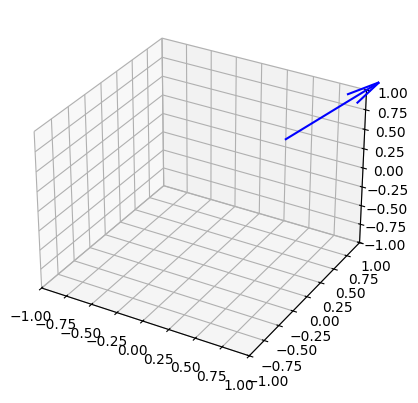

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from flow_testing.data.utils import *

# create a random axis
axis = np.array([1,1,1]) - np.array([0.5, 0.5, 0.5])

# create a random postion near the axis
position = axis + np.random.rand(3) 
axis = axis / np.linalg.norm(axis)

# create a random rotation
rotation = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(position[0], position[1], position[2], color='red')
ax.quiver(0.5, 0.5, 0.5, axis[0], axis[1], axis[2], color='blue')
# change the axis limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

In [6]:
# create a random rotation
rotation = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, -1]
])


In [7]:
rot_obj = Rotation(rotation[None, :])

In [8]:
rot_obj.rot_matrix.shape

(1, 3, 3)

In [9]:
new_position = rotate_around_axis(position[None, :], axis, rot_obj)[0]

In [10]:
print(new_position)
print(position)

[-0.7078235  -0.70638788 -0.00143562]
[1.262058   1.2630229  0.78728722]


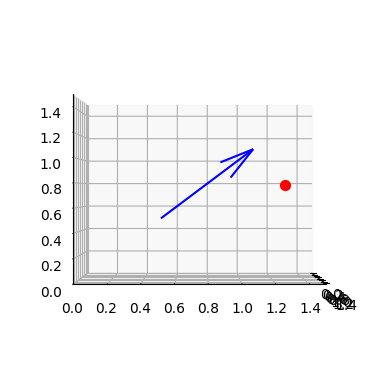

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_position[0], new_position[1], new_position[2], color='green', s=100)
ax.scatter(position[0], position[1], position[2], color='red', s=50)
ax.quiver(0.5, 0.5, 0.5, axis[0], axis[1], axis[2], color='blue')
# change the axis limits
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.5)
ax.set_zlim(0, 1.5)
# align the view to look at the end of the axis
ax.view_init(azim=0, elev=0)
plt.show()

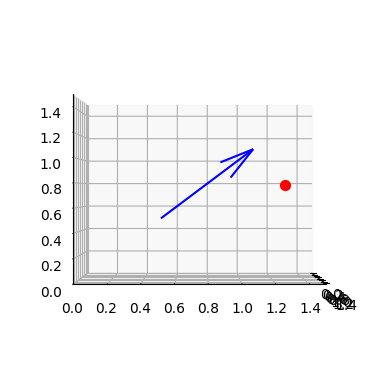

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(position[0], position[1], position[2], color='red', s=50)
ax.quiver(0.5, 0.5, 0.5, axis[0], axis[1], axis[2], color='blue')
# change the axis limits
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.5)
ax.set_zlim(0, 1.5)
# align the view to look at the end of the axis
ax.view_init(azim=0, elev=0)
plt.show()

[1.262058   1.2630229  0.78728722]
[-1.2630229  1.262058   0.       ]
[-9.64895548e-04  2.52508090e+00  7.87287218e-01]


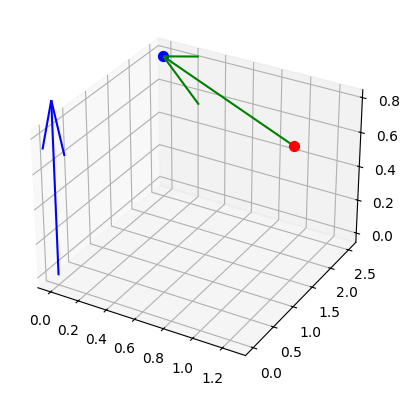

In [13]:
# vector from position to the nearest point on the axis
# use the angle to calculate the perpendicular vector
# set the axis to the z axis
axis = np.array([0, 0, 1])
perpendicular_vector = np.cross(axis, position)
print(position)
print(perpendicular_vector)
new_position = position + perpendicular_vector
print(new_position)

# plot the perpendicular vector
# plot the position
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot the vector from the point to the axis
ax.quiver(position[0], position[1], position[2], perpendicular_vector[0], perpendicular_vector[1], perpendicular_vector[2], color='green')
ax.scatter(position[0], position[1], position[2], color='red', s=50)
ax.scatter(new_position[0], new_position[1], new_position[2], color='blue', s=50)
ax.quiver(0.0, 0.0, 0.0, axis[0], axis[1], axis[2], color='blue')
plt.show()

In [14]:
import numpy as np

def shortest_distance_to_axis(point, axis_point, axis_direction):
    """
    Calculate the shortest distance vector from a point to an axis.
    
    Parameters:
    -----------
    point : array-like
        The position point (e.g., [x, y, z])
    axis_point : array-like
        A point on the axis (e.g., [x, y, z])
    axis_direction : array-like
        Direction vector of the axis (will be normalized)
    
    Returns:
    --------
    distance_vector : numpy array
        Vector from the closest point on the axis to the given point
    distance : float
        Magnitude of the distance
    """
    # Convert to numpy arrays
    p = np.array(point)
    a = np.array(axis_point)
    d = np.array(axis_direction)
    
    # Normalize the direction vector
    d = d / np.linalg.norm(d)
    
    # Vector from axis point to the given point
    ap = p - a
    
    # Project onto the axis direction
    parallel_component = np.dot(ap, d) * d
    
    # Subtract to get perpendicular component (shortest distance vector)
    distance_vector = ap - parallel_component
    
    # Calculate the distance magnitude
    distance = np.linalg.norm(distance_vector)
    
    return distance_vector, distance

In [15]:
axis_point = np.array([5, 5, 0])
position = np.array([10, 10, 10])
dis_vec, distance = shortest_distance_to_axis(position, axis_point, axis)

print(position)
print(dis_vec)
print(distance)

[10 10 10]
[5. 5. 0.]
7.0710678118654755


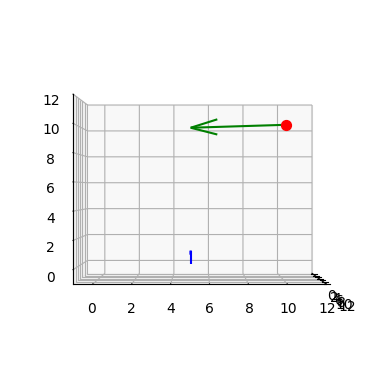

In [16]:
# plot the distance vector
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(axis_point[0], axis_point[1], axis_point[2], axis[0], axis[1], axis[2], color='blue')
new_position = position + dis_vec
ax.quiver(position[0], position[1], position[2], -dis_vec[0], -dis_vec[1], -dis_vec[2], color='green')
ax.scatter(position[0], position[1], position[2], color='red', s=50)
ax.set_xlim(-1, 12)
ax.set_ylim(-1, 12)
ax.set_zlim(-1, 12)
ax.view_init(azim=0, elev=0)

# make the 3D view interactive
plt.show()

[ 5.  5. 10.]


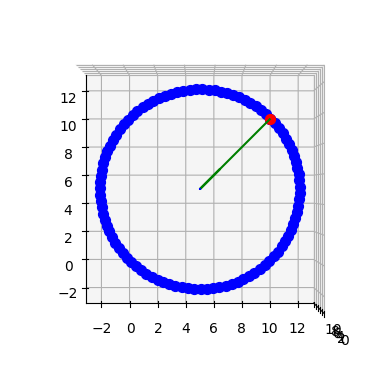

In [17]:
# rotate the position around the axis by the angle

# 1. Set the nearest point on the axis to the origin
# 2. Rotate the position around the axis by the angle
# 3. Translate the position back to the original position

# 1. Set the nearest point on the axis to the origin

tmp_position = position - dis_vec
print(tmp_position)

# 2. Rotate the position around the axis by the angle
# make a range of possible rotation angles
angles = np.linspace(0, 2*np.pi, 100)
new_positions = []

# rotate the position around the axis by the angle
for angle in angles:
    rot_obj = Rotation(np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0, 0, 1]])[None, :])
    rotated_position = rot_obj.apply(tmp_position[None, :])[0]
    new_position = rotated_position + dis_vec
    new_positions.append(new_position)
# 3. Translate the position back to the original position

# plot the position
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot the new positions
for new_position in new_positions:
    ax.scatter(new_position[0], new_position[1], new_position[2], color='blue', s=50)
ax.scatter(position[0], position[1], position[2], color='red', s=50)

ax.quiver(axis_point[0], axis_point[1], axis_point[2], axis[0], axis[1], axis[2], color='blue')
ax.quiver(position[0], position[1], position[2], -dis_vec[0], -dis_vec[1], -dis_vec[2], color='green')
# set the view to look down along the axis
ax.view_init(azim=0, elev=-90)
plt.show()


In [18]:
from flow_testing.data.protein_constants import idealized_AA_positions

idealized_AA_positions

ideal_amino_acid = idealized_AA_positions[restype_1to3[restypes[0]]]
bb_atoms = np.stack([list(ideal_amino_acid[x][2]) for x in range(4)])

print(bb_atoms)

[[-0.525  1.363  0.   ]
 [ 0.     0.     0.   ]
 [ 1.526 -0.    -0.   ]
 [-0.529 -0.774 -1.205]]


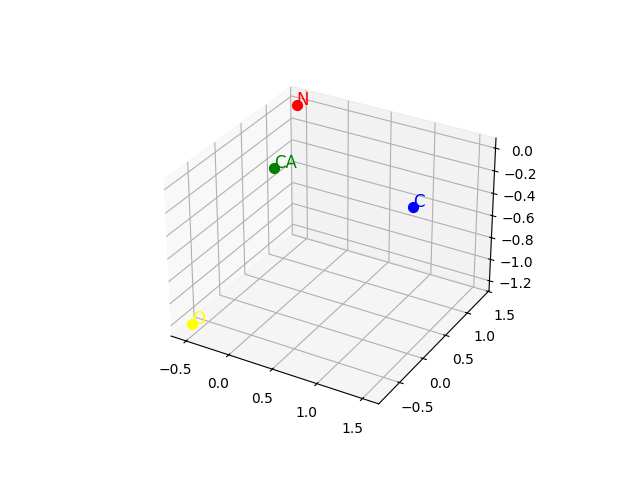

In [25]:
# plot the atoms
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D # Necessary for 3D projection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bb_atoms[0, 0], bb_atoms[0, 1], bb_atoms[0, 2], color='red', s=50, label='N')
ax.text(bb_atoms[0, 0], bb_atoms[0, 1], bb_atoms[0, 2], 'N', color='red', fontsize=12)

ax.scatter(bb_atoms[1, 0], bb_atoms[1, 1], bb_atoms[1, 2], color='green', s=50, label='CA')
ax.text(bb_atoms[1, 0], bb_atoms[1, 1], bb_atoms[1, 2], 'CA', color='green', fontsize=12)

ax.scatter(bb_atoms[2, 0], bb_atoms[2, 1], bb_atoms[2, 2], color='blue', s=50, label='C')
ax.text(bb_atoms[2, 0], bb_atoms[2, 1], bb_atoms[2, 2], 'C', color='blue', fontsize=12)

ax.scatter(bb_atoms[3, 0], bb_atoms[3, 1], bb_atoms[3, 2], color='yellow', s=50, label='O')
ax.text(bb_atoms[3, 0], bb_atoms[3, 1], bb_atoms[3, 2], 'O', color='yellow', fontsize=12)

# have the label appear next to the atom
plt.show()

[0. 0. 0.]
[ 1.526 -0.    -0.   ]
[ 0.    -0.774 -1.205]
1.4321665405950526


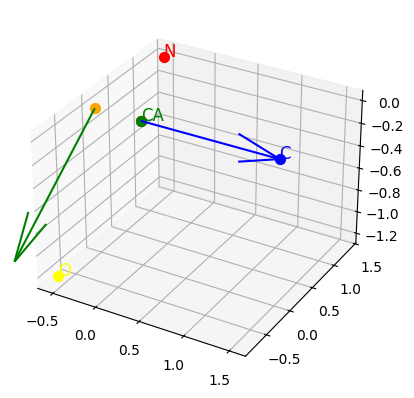

In [20]:
# axis point is the CA atom
axis_point = bb_atoms[1, :]
# axis direction is the vector from CA to the C atom
axis_direction = bb_atoms[2, :] - bb_atoms[1, :]

print(axis_point)
print(axis_direction)

# plot the axis_point and axis_direction
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(axis_point[0], axis_point[1], axis_point[2], color='red', s=50)
ax.quiver(axis_point[0], axis_point[1], axis_point[2], axis_direction[0], axis_direction[1], axis_direction[2], color='blue')

# plot the bb_atoms
ax.scatter(bb_atoms[0, 0], bb_atoms[0, 1], bb_atoms[0, 2], color='red', s=50, label='N')
ax.scatter(bb_atoms[1, 0], bb_atoms[1, 1], bb_atoms[1, 2], color='green', s=50, label='CA')
ax.scatter(bb_atoms[2, 0], bb_atoms[2, 1], bb_atoms[2, 2], color='blue', s=50, label='C')
ax.scatter(bb_atoms[3, 0], bb_atoms[3, 1], bb_atoms[3, 2], color='yellow', s=50, label='O')

# have the label appear next to the atom
ax.text(bb_atoms[0, 0], bb_atoms[0, 1], bb_atoms[0, 2], 'N', color='red', fontsize=12)
ax.text(bb_atoms[1, 0], bb_atoms[1, 1], bb_atoms[1, 2], 'CA', color='green', fontsize=12)
ax.text(bb_atoms[2, 0], bb_atoms[2, 1], bb_atoms[2, 2], 'C', color='blue', fontsize=12)
ax.text(bb_atoms[3, 0], bb_atoms[3, 1], bb_atoms[3, 2], 'O', color='yellow', fontsize=12)

# shortest distance to the axis
dis_vec, distance = shortest_distance_to_axis(bb_atoms[3, :], axis_point, axis_direction)
print(dis_vec)
print(distance)
# plot the dis_vec, from the O atom to the nearest point on the axis
point_on_axis = bb_atoms[3, :] - dis_vec
ax.scatter(point_on_axis[0], point_on_axis[1], point_on_axis[2], color='orange', s=50)

# plot the vector from the O atom to the point on the axis
ax.quiver(point_on_axis[0], point_on_axis[1], point_on_axis[2], bb_atoms[3, 0], bb_atoms[3, 1], bb_atoms[3, 2], color='green')



plt.show()


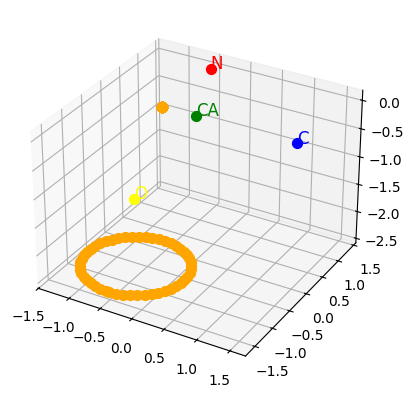

In [21]:

# rotate the oxygen atom around the axis by the angle
angle = np.pi / 2
# rotate the axis direction by a range of angles
angles = np.linspace(0, 2*np.pi, 100)
original_oxygen_position = bb_atoms[3, :]
new_oxygen_positions = []
for angle in angles:
    rot_obj = Rotation(np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0, 0, 1]])[None, :])
    tmp_position = original_oxygen_position - dis_vec
    dis_vec, distance = shortest_distance_to_axis(tmp_position, axis_point, axis_direction)
    # rotate the dis_vec by the angle
    rot_dis_vec = rot_obj.apply(dis_vec[None, :])[0]
    new_oxygen_position = tmp_position + rot_dis_vec
    new_oxygen_positions.append(new_oxygen_position)

# plot the atoms
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bb_atoms[0, 0], bb_atoms[0, 1], bb_atoms[0, 2], color='red', s=50, label='N')
ax.scatter(bb_atoms[1, 0], bb_atoms[1, 1], bb_atoms[1, 2], color='green', s=50, label='CA')
ax.scatter(bb_atoms[2, 0], bb_atoms[2, 1], bb_atoms[2, 2], color='blue', s=50, label='C')
ax.scatter(bb_atoms[3, 0], bb_atoms[3, 1], bb_atoms[3, 2], color='yellow', s=50, label='O')
# plot the new oxygen atom
for new_oxygen_position in new_oxygen_positions:
    ax.scatter(new_oxygen_position[0], new_oxygen_position[1], new_oxygen_position[2], color='orange', s=50, label='O')

ax.text(bb_atoms[0, 0], bb_atoms[0, 1], bb_atoms[0, 2], 'N', color='red', fontsize=12)
ax.text(bb_atoms[1, 0], bb_atoms[1, 1], bb_atoms[1, 2], 'CA', color='green', fontsize=12)
ax.text(bb_atoms[2, 0], bb_atoms[2, 1], bb_atoms[2, 2], 'C', color='blue', fontsize=12)
ax.text(bb_atoms[3, 0], bb_atoms[3, 1], bb_atoms[3, 2], 'O', color='yellow', fontsize=12)

# have the label appear next to the atom
plt.show()


In [ ]:
from biotite.structure.io import load_structure, save_structure


struct = load_structure('/home/luke/code/flow_testing/test-data/pdbs/8UVY_biotite.pdb')

# only keep 

In [1]:
from flow_testing.data.protein_constants import idealized_AA_positions
import numpy as np

print(idealized_AA_positions)

# distance from CA to N
N_atom = np.array(idealized_AA_positions['ALA'][0][2])
CA_atom = np.array(idealized_AA_positions['ALA'][1][2])
C_atom = np.array(idealized_AA_positions['ALA'][2][2])
CB_atom = np.array(idealized_AA_positions['ALA'][3][2])
O_atom = np.array(idealized_AA_positions['ALA'][4][2])

print(CA_atom)
print(N_atom)
distance_ca_n = np.linalg.norm(CA_atom - N_atom)
print('Ideal distance from CA to N')
print(distance_ca_n)

distance_ca_cb = np.linalg.norm(CA_atom - CB_atom)
print('Ideal distance from CA to CB')
print(distance_ca_cb)

distance_ca_c = np.linalg.norm(CA_atom - C_atom)
print('Ideal distance from CA to C')
print(distance_ca_c)

{'ALA': [['N', 0, (-0.525, 1.363, 0.0)], ['CA', 0, (0.0, 0.0, 0.0)], ['C', 0, (1.526, -0.0, -0.0)], ['CB', 0, (-0.529, -0.774, -1.205)], ['O', 3, (0.627, 1.062, 0.0)]]}
[0. 0. 0.]
[-0.525  1.363  0.   ]
Ideal distance from CA to N
1.4606142543464375
Ideal distance from CA to CB
1.526742283425726
Ideal distance from CA to C
1.526


New CA atom position : [0. 0. 0.]
New N atom position : [ 0.30310889 -0.78692842  0.        ]
--------------------------------------------------
Original distance from CA to N : 1.4606142543464375
Distance from CA to N after rotation : 0.8432860329291204
Difference in distance after rotation CA to N : 0.6173282214173171


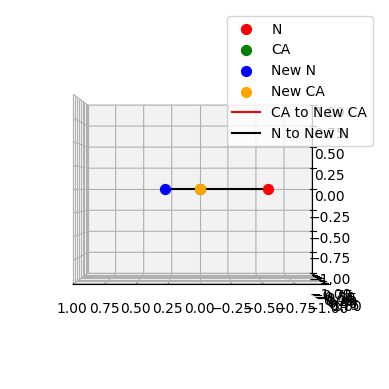

In [17]:
from flow_testing.data.rigid import Rigid
from flow_testing.data.rot import Rotation

# make a random rotation matrix
rot_matrix = np.random.rand(3, 3)

# Create a rotation matrix that inverts the position of the x,y,z values
rot_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, -1]])

rot_matrix = rot_matrix / np.linalg.norm(rot_matrix)

test_rigid = Rigid(np.array([0, 0, 0])[None, :], Rotation(rot_matrix[None, :]))

new_ca_atom = test_rigid.apply(CA_atom[None, :])[0]
print(f"New CA atom position : {new_ca_atom}")
new_n_atom = test_rigid.apply(N_atom[None, :])[0]
print(f"New N atom position : {new_n_atom}")
print("-" * 50)
distance_newCA_to_newN = np.linalg.norm(new_ca_atom - new_n_atom)
print(f"Original distance from CA to N : {distance_ca_n}")
print(f"Distance from CA to N after rotation : {distance_newCA_to_newN}")
print(f"Difference in distance after rotation CA to N : {distance_ca_n - distance_newCA_to_newN}")

# plot the atoms
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(N_atom[0], N_atom[1], N_atom[2], color='red', s=50, label='N')
ax.scatter(CA_atom[0], CA_atom[1], CA_atom[2], color='green', s=50, label='CA')
ax.scatter(new_n_atom[0], new_n_atom[1], new_n_atom[2], color='blue', s=50, label='New N')
ax.scatter(new_ca_atom[0], new_ca_atom[1], new_ca_atom[2], color='orange', s=50, label='New CA')
# draw a line from the original CA to the new CA, with a label
ax.plot([CA_atom[0], new_ca_atom[0]], [CA_atom[1], new_ca_atom[1]], [CA_atom[2], new_ca_atom[2]], color='red', label='CA to New CA')
# draw a line from the original N to the new N, with a label
ax.plot([N_atom[0], new_n_atom[0]], [N_atom[1], new_n_atom[1]], [N_atom[2], new_n_atom[2]], color='black', label='N to New N')
# have the label appear next to the atom
ax.legend()
# show the axis lines
# set the axis limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# view the plot from the side
ax.view_init(azim=90, elev=0)
plt.show()

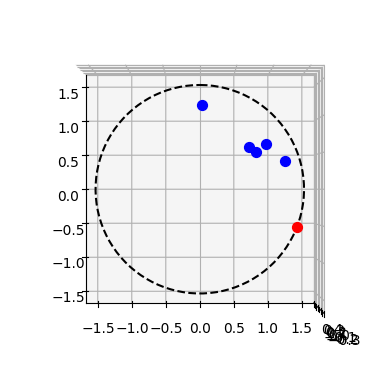

In [18]:

# Create 5 random rotation matrices
rotation_matrices = np.random.rand(5, 3, 3)

# Create 5 rigid transformations
rigid_transformations = [Rigid(np.array([0, 0, 0])[None, :], Rotation(rotation_matrices[i][None, :])) for i in range(5)]

# Apply the rigid transformations to the N atom
new_N_atoms = [rigid.apply(N_atom[None, :])[0] for rigid in rigid_transformations]
# plot the atoms
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for new_N_atom in new_N_atoms:
    ax.scatter(new_N_atom[0], new_N_atom[1], new_N_atom[2], color='blue', s=50, label='New N')

ax.scatter(N_atom[0], N_atom[1], N_atom[2], color='red', s=50, label='N')
# view from looking down the z axis
ax.view_init(azim=0, elev=-90)
# draw a circle centered at 0,0,0 with a radius of the distance from the origin to the N atom
# make it valid for a 3D plot 
circle_points = []
for angle in np.linspace(0, 2*np.pi, 100):
    # need to have its radius be the distance from the origin to the N atom
    circle_points.append(np.array([np.cos(angle), np.sin(angle), 0]) * distance_ca_n)
circle_points = np.array(circle_points)
# plot the circle
ax.plot(circle_points[:, 0], circle_points[:, 1], circle_points[:, 2], color='black', linestyle='--')

plt.show()

In [3]:
import numpy as np

def rotate_vectors(vectors, rotation_matrices):
    """
    Rotate a batch of vectors by a batch of rotation matrices.
    
    Parameters:
    -----------
    vectors : np.ndarray
        Array of shape (N, 3) or (N, D) where N is the number of vectors
        and D is the dimensionality (typically 3 for 3D rotation)
    rotation_matrices : np.ndarray
        Array of shape (N, D, D) where N is the number of rotation matrices
        and D x D is the size of each rotation matrix.
        Must be orthogonal matrices (R @ R.T = I) for valid rotations.
    
    Returns:
    --------
    rotated_vectors : np.ndarray
        Array of shape (N, D) containing the rotated vectors
    """
    # Validate inputs
    if vectors.ndim != 2:
        raise ValueError(f"vectors must be 2D array, got shape {vectors.shape}")
    
    if rotation_matrices.ndim != 3:
        raise ValueError(f"rotation_matrices must be 3D array, got shape {rotation_matrices.shape}")
    
    N, D = vectors.shape
    N_rot, D_rot1, D_rot2 = rotation_matrices.shape
    
    if N != N_rot:
        raise ValueError(f"Number of vectors ({N}) must match number of rotation matrices ({N_rot})")
    
    if D != D_rot1 or D != D_rot2:
        raise ValueError(f"Vector dimension ({D}) must match rotation matrix dimensions ({D_rot1}x{D_rot2})")
    
    # Rotate using einsum
    rotated_vectors = np.einsum('nij,nj->ni', rotation_matrices, vectors)
    
    return rotated_vectors


def verify_rotation_matrices(rotation_matrices, tolerance=1e-6):
    """
    Verify that matrices are valid rotation matrices (orthogonal with det=1).
    
    A valid rotation matrix R must satisfy:
    1. R @ R.T = I (orthogonality - preserves distances)
    2. det(R) = 1 (proper rotation, not reflection)
    """
    N = rotation_matrices.shape[0]
    D = rotation_matrices.shape[1]
    
    # Check orthogonality: R @ R.T should equal identity
    identity = np.eye(D)
    products = rotation_matrices @ rotation_matrices.transpose(0, 2, 1)
    is_orthogonal = np.allclose(products, identity, atol=tolerance)
    
    # Check determinants equal 1
    dets = np.linalg.det(rotation_matrices)
    is_proper = np.allclose(dets, 1.0, atol=tolerance)
    
    return is_orthogonal and is_proper


# Example usage with verification
if __name__ == "__main__":
    # Create 5 random 3D vectors
    vectors = np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [3, 4, 0],  # Length 5
        [1, 1, 1]   # Length sqrt(3)
    ], dtype=float)
    
    # Create 5 rotation matrices (rotation around z-axis by different angles)
    angles = np.array([0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2])
    rotation_matrices = np.zeros((5, 3, 3))
    
    for i, angle in enumerate(angles):
        c, s = np.cos(angle), np.sin(angle)
        rotation_matrices[i] = np.array([
            [c, -s, 0],
            [s, c, 0],
            [0, 0, 1]
        ])
    
    # Verify the rotation matrices are valid
    print("Rotation matrices are valid:", verify_rotation_matrices(rotation_matrices))
    
    # Calculate original distances from origin
    original_distances = np.linalg.norm(vectors, axis=1)
    
    # Rotate the vectors
    rotated = rotate_vectors(vectors, rotation_matrices)
    
    # Calculate rotated distances from origin
    rotated_distances = np.linalg.norm(rotated, axis=1)
    
    print("\nOriginal vectors and distances:")
    for i, (v, d) in enumerate(zip(vectors, original_distances)):
        print(f"  Vector {i}: {v}, distance: {d:.6f}")
    
    print("\nRotated vectors and distances:")
    for i, (v, d) in enumerate(zip(rotated, rotated_distances)):
        print(f"  Vector {i}: {v}, distance: {d:.6f}")
    
    print("\nDistance preserved:", np.allclose(original_distances, rotated_distances))
    print("Max distance change:", np.max(np.abs(original_distances - rotated_distances)))

Rotation matrices are valid: True

Original vectors and distances:
  Vector 0: [1. 0. 0.], distance: 1.000000
  Vector 1: [0. 1. 0.], distance: 1.000000
  Vector 2: [0. 0. 1.], distance: 1.000000
  Vector 3: [3. 4. 0.], distance: 5.000000
  Vector 4: [1. 1. 1.], distance: 1.732051

Rotated vectors and distances:
  Vector 0: [1. 0. 0.], distance: 1.000000
  Vector 1: [-0.70710678  0.70710678  0.        ], distance: 1.000000
  Vector 2: [0. 0. 1.], distance: 1.000000
  Vector 3: [-3. -4.  0.], distance: 5.000000
  Vector 4: [ 1. -1.  1.], distance: 1.732051

Distance preserved: True
Max distance change: 0.0


In [1]:
from biotite.structure.io import load_structure, save_structure
from flow_testing.data.utils import calculate_backbone
from flow_testing.data.protein import Protein
fp = '/home/luke/code/flow_testing/test-data/pdbs/8UVY.pdb'

protein = Protein.from_pdb(fp)
protein.center(type='backbone')
protein.to_pdb('test-data/pdbs/8UVY_converted.pdb')
rigid = protein.to_bb_rigid()

In [4]:
rigid.rot.rot_matrix.shape

for i in range(rigid.rot.rot_matrix.shape[0]):
    if not verify_rotation_matrices(rigid.rot.rot_matrix[i][None, :]):
        print(f"Rotation matrix {i} is not valid")
        verify_rotation_matrices(rigid.rot.rot_matrix[i][None, :])


Rotation matrix 0 is not valid
Rotation matrix 1 is not valid
Rotation matrix 2 is not valid
Rotation matrix 3 is not valid
Rotation matrix 4 is not valid
Rotation matrix 5 is not valid
Rotation matrix 6 is not valid
Rotation matrix 7 is not valid
Rotation matrix 8 is not valid
Rotation matrix 9 is not valid
Rotation matrix 10 is not valid
Rotation matrix 11 is not valid
Rotation matrix 12 is not valid
Rotation matrix 13 is not valid
Rotation matrix 14 is not valid
Rotation matrix 15 is not valid
Rotation matrix 16 is not valid
Rotation matrix 17 is not valid
Rotation matrix 18 is not valid
Rotation matrix 19 is not valid
Rotation matrix 20 is not valid
Rotation matrix 21 is not valid
Rotation matrix 22 is not valid
Rotation matrix 23 is not valid
Rotation matrix 24 is not valid
Rotation matrix 25 is not valid
Rotation matrix 26 is not valid
Rotation matrix 27 is not valid
Rotation matrix 28 is not valid
Rotation matrix 29 is not valid
Rotation matrix 30 is not valid
Rotation matrix 31

In [5]:
import numpy as np

def matrix_to_rigids_corrected(matrix: np.ndarray):
    """
    Convert a matrix of 3D positions to rotation matrices using Gram-Schmidt.

    Expected shape: [n, 3, 3]
    Where the first axis is the end of the v1 vector, 
    the second axis is the basis vector and the third axis is the end of the v2 vector.

    Returns:
        rotation_matrices: [n, 3, 3] orthogonal rotation matrices
        translations: [n, 3] basis vectors (origins)
    """
    basis_vectors = matrix[:, 1, :]  # Origins
    v1s = matrix[:, 0, :] - basis_vectors  # First direction vectors
    v2s = matrix[:, 2, :] - basis_vectors  # Second direction vectors

    rots = []

    for v1, v2 in zip(v1s, v2s):
        # Normalize v1 to get first basis vector
        e1 = v1 / np.linalg.norm(v1)
        
        # Gram-Schmidt: orthogonalize v2 with respect to e1
        u2 = v2 - np.dot(e1, v2) * e1  # Project out e1 component from v2
        
        # Normalize u2 to get second basis vector
        e2 = u2 / np.linalg.norm(u2)
        
        # Third basis vector via cross product (perpendicular to both e1 and e2)
        e3 = np.cross(e1, e2)
        
        # Stack as rows (each row is a basis vector)
        rotation_matrix = np.stack([e1, e2, e3], axis=0)
        rots.append(rotation_matrix)

    rot = np.stack(rots, axis=0)
    trans = basis_vectors

    return rot, trans


# Verification function
def verify_rotation_matrices(rotation_matrices, tolerance=1e-6):
    """Verify that matrices are valid rotation matrices."""
    N = rotation_matrices.shape[0]
    D = rotation_matrices.shape[1]
    
    # Check orthogonality: R @ R.T should equal identity
    identity = np.eye(D)
    products = rotation_matrices @ rotation_matrices.transpose(0, 2, 1)
    is_orthogonal = np.allclose(products, identity, atol=tolerance)
    
    # Check determinants equal 1
    dets = np.linalg.det(rotation_matrices)
    is_proper = np.allclose(dets, 1.0, atol=tolerance)
    
    if not is_orthogonal:
        print("WARNING: Matrices are not orthogonal!")
        print("Max deviation from identity:", 
              np.max(np.abs(products - identity)))
    
    if not is_proper:
        print("WARNING: Determinants are not 1!")
        print("Determinants:", dets)
    
    return is_orthogonal and is_proper


# Test the function
if __name__ == "__main__":
    # Create test data: 3 rigid frames
    # Each frame has 3 points: [v1_end, basis, v2_end]
    test_matrix = np.array([
        # Frame 1: aligned with global axes
        [[1, 0, 0],   # v1 end
         [0, 0, 0],   # basis (origin)
         [0, 1, 0]],  # v2 end
        
        # Frame 2: rotated 45 degrees around z
        [[np.cos(np.pi/4), np.sin(np.pi/4), 0],
         [0, 0, 0],
         [-np.sin(np.pi/4), np.cos(np.pi/4), 0]],
        
        # Frame 3: arbitrary orientation
        [[2, 1, 0],
         [1, 0, 0],
         [1, 2, 1]]
    ])
    
    rotation_matrices, translations = matrix_to_rigids_corrected(test_matrix)
    
    print("Generated rotation matrices:")
    print(rotation_matrices)
    print("\nTranslations (basis vectors):")
    print(translations)
    print("\nAre rotation matrices valid?", 
          verify_rotation_matrices(rotation_matrices))
    
    # Check each matrix individually
    for i, R in enumerate(rotation_matrices):
        print(f"\nFrame {i}:")
        print(f"  Orthogonality (R @ R.T):\n{R @ R.T}")
        print(f"  Determinant: {np.linalg.det(R):.6f}")

Generated rotation matrices:
[[[ 1.          0.          0.        ]
  [ 0.          1.          0.        ]
  [ 0.          0.          1.        ]]

 [[ 0.70710678  0.70710678  0.        ]
  [-0.70710678  0.70710678  0.        ]
  [ 0.         -0.          1.        ]]

 [[ 0.70710678  0.70710678  0.        ]
  [-0.57735027  0.57735027  0.57735027]
  [ 0.40824829 -0.40824829  0.81649658]]]

Translations (basis vectors):
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]

Are rotation matrices valid? True

Frame 0:
  Orthogonality (R @ R.T):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Determinant: 1.000000

Frame 1:
  Orthogonality (R @ R.T):
[[ 1.00000000e+00 -1.01465364e-17  0.00000000e+00]
 [-1.01465364e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
  Determinant: 1.000000

Frame 2:
  Orthogonality (R @ R.T):
[[1.00000000e+00 2.62834269e-16 8.25542809e-18]
 [2.62834269e-16 1.00000000e+00 6.91178734e-17]
 [8.25542809e-18 6.91178734e-17 1.00000000e+00]]
  Deter

In [ ]:
import numpy as np

def reference_from_3_points(p_neg_x_axis, origin, p_xy_plane, eps=1e-8):
    """
    Reference implementation matching the PyTorch version.
    Implements algorithm 21 - Gram-Schmidt construction.
    
    Args:
        p_neg_x_axis: [N, 3] coordinates
        origin: [N, 3] coordinates used as frame origins
        p_xy_plane: [N, 3] coordinates
        eps: Small epsilon value for numerical stability
    
    Returns:
        rotation_matrices: [N, 3, 3] in column-major format
        translations: [N, 3] origins
    """
    N = p_neg_x_axis.shape[0]
    
    # e0 points FROM p_neg_x_axis TO origin (positive x-axis direction)
    e0 = origin - p_neg_x_axis
    
    # e1 points FROM origin TO p_xy_plane
    e1 = p_xy_plane - origin
    
    rots = []
    
    for i in range(N):
        # Normalize e0
        denom = np.sqrt(np.sum(e0[i] * e0[i]) + eps)
        e0_norm = e0[i] / denom
        
        # Gram-Schmidt: remove e0 component from e1
        dot = np.sum(e0_norm * e1[i])
        e1_ortho = e1[i] - e0_norm * dot
        
        # Normalize e1
        denom = np.sqrt(np.sum(e1_ortho * e1_ortho) + eps)
        e1_norm = e1_ortho / denom
        
        # Cross product for e2
        e2_norm = np.array([
            e0_norm[1] * e1_norm[2] - e0_norm[2] * e1_norm[1],
            e0_norm[2] * e1_norm[0] - e0_norm[0] * e1_norm[2],
            e0_norm[0] * e1_norm[1] - e0_norm[1] * e1_norm[0],
        ])
        
        # Stack as columns (column-major format)
        rotation_matrix = np.stack([e0_norm, e1_norm, e2_norm], axis=1)
        rots.append(rotation_matrix)
    
    rot = np.stack(rots, axis=0)
    trans = origin
    
    return rot, trans


def matrix_to_rigids(matrix: np.ndarray, eps: float = 1e-8):
    """
    Your implementation - should match reference when given same inputs.
    
    Expected shape: [n, 3, 3]
    matrix[:, 0, :] = p_neg_x_axis
    matrix[:, 1, :] = origin
    matrix[:, 2, :] = p_xy_plane
    """
    p_neg_x_axis = matrix[:, 0, :]
    origin = matrix[:, 1, :]
    p_xy_plane = matrix[:, 2, :]
    
    return reference_from_3_points(p_neg_x_axis, origin, p_xy_plane, eps)


def verify_rotation_matrices(rotation_matrices, tolerance=1e-6):
    """Verify that matrices are valid rotation matrices."""
    N = rotation_matrices.shape[0]
    D = rotation_matrices.shape[1]
    
    identity = np.eye(D)
    products = rotation_matrices @ rotation_matrices.transpose(0, 2, 1)
    is_orthogonal = np.allclose(products, identity, atol=tolerance)
    
    dets = np.linalg.det(rotation_matrices)
    is_proper = np.allclose(dets, 1.0, atol=tolerance)
    
    return is_orthogonal and is_proper


def compare_frames_detailed(rot1, trans1, rot2, trans2, tolerance=1e-10):
    """
    Detailed comparison of two sets of frames.
    """
    N = rot1.shape[0]
    
    print(f"\nComparing {N} frames:")
    print("="*70)
    
    # Compare translations
    trans_match = np.allclose(trans1, trans2, atol=tolerance)
    trans_diff = np.max(np.abs(trans1 - trans2))
    print(f"Translations match: {trans_match}")
    print(f"Max translation difference: {trans_diff:.2e}")
    
    # Compare rotations
    rot_match = np.allclose(rot1, rot2, atol=tolerance)
    rot_diff = np.max(np.abs(rot1 - rot2))
    print(f"Rotations match: {rot_match}")
    print(f"Max rotation difference: {rot_diff:.2e}")
    
    # Check each frame individually
    all_match = True
    for i in range(N):
        frame_match = np.allclose(rot1[i], rot2[i], atol=tolerance)
        if not frame_match:
            all_match = False
            print(f"\n  Frame {i} DIFFERS:")
            print(f"    Max difference: {np.max(np.abs(rot1[i] - rot2[i])):.2e}")
            
            # Check if it's just a sign flip
            sign_flipped = np.allclose(rot1[i], -rot2[i], atol=tolerance)
            if sign_flipped:
                print(f"    Note: Frames differ by global sign flip")
    
    if all_match:
        print("\n✓ All frames match perfectly!")
    
    return trans_match and rot_match


# Comprehensive test suite
if __name__ == "__main__":
    print("Testing if both implementations produce identical frames")
    print("="*70)
    
    # Test 1: Simple axis-aligned frame
    print("\n" + "="*70)
    print("TEST 1: Axis-aligned frame at origin")
    print("="*70)
    
    test1_points = np.array([
        [[-1, 0, 0],   # p_neg_x_axis (1 unit in -x from origin)
         [0, 0, 0],    # origin
         [0, 1, 0]]    # p_xy_plane (1 unit in +y from origin)
    ], dtype=np.float64)
    
    # Method 1: Using matrix format
    rot1, trans1 = matrix_to_rigids(test1_points)
    
    # Method 2: Using separate points (reference style)
    rot2, trans2 = reference_from_3_points(
        test1_points[:, 0, :],  # p_neg_x_axis
        test1_points[:, 1, :],  # origin
        test1_points[:, 2, :],  # p_xy_plane
    )
    
    print("\nMethod 1 (matrix_to_rigids):")
    print(f"Valid: {verify_rotation_matrices(rot1)}")
    print(f"Rotation:\n{rot1[0]}")
    print(f"Translation: {trans1[0]}")
    
    print("\nMethod 2 (reference):")
    print(f"Valid: {verify_rotation_matrices(rot2)}")
    print(f"Rotation:\n{rot2[0]}")
    print(f"Translation: {trans2[0]}")
    
    compare_frames_detailed(rot1, trans1, rot2, trans2, tolerance=1e-10)
    
    # Expected result: x-axis = [1,0,0], y-axis = [0,1,0], z-axis = [0,0,1]
    print("\nExpected rotation (should be identity):")
    print(np.eye(3))
    
    # Test 2: Rotated frame
    print("\n" + "="*70)
    print("TEST 2: Rotated frame (45° around z-axis)")
    print("="*70)
    
    angle = np.pi / 4
    c, s = np.cos(angle), np.sin(angle)
    test2_points = np.array([
        [[-c, -s, 0],   # p_neg_x_axis rotated
         [0, 0, 0],     # origin
         [-s, c, 0]]    # p_xy_plane rotated
    ], dtype=np.float64)
    
    rot1, trans1 = matrix_to_rigids(test2_points)
    rot2, trans2 = reference_from_3_points(
        test2_points[:, 0, :],
        test2_points[:, 1, :],
        test2_points[:, 2, :],
    )
    
    print(f"\nMethod 1 valid: {verify_rotation_matrices(rot1)}")
    print(f"Method 2 valid: {verify_rotation_matrices(rot2)}")
    compare_frames_detailed(rot1, trans1, rot2, trans2, tolerance=1e-10)
    
    # Test 3: Multiple frames at different positions and orientations
    print("\n" + "="*70)
    print("TEST 3: Batch of 5 frames with various orientations")
    print("="*70)
    
    np.random.seed(42)
    N = 5
    test3_points = np.zeros((N, 3, 3))
    
    for i in range(N):
        # Random origin
        origin = np.random.randn(3) * 2
        
        # Random direction for x-axis
        v1 = np.random.randn(3)
        v1 = v1 / np.linalg.norm(v1)
        
        # Random direction for xy-plane (not parallel to v1)
        v2 = np.random.randn(3)
        v2 = v2 - np.dot(v2, v1) * v1  # Make orthogonal to v1
        v2 = v2 / np.linalg.norm(v2)
        
        # Construct points
        test3_points[i, 0, :] = origin - v1  # p_neg_x_axis
        test3_points[i, 1, :] = origin       # origin
        test3_points[i, 2, :] = origin + v2  # p_xy_plane
    
    rot1, trans1 = matrix_to_rigids(test3_points)
    rot2, trans2 = reference_from_3_points(
        test3_points[:, 0, :],
        test3_points[:, 1, :],
        test3_points[:, 2, :],
    )
    
    print(f"\nMethod 1 valid: {verify_rotation_matrices(rot1)}")
    print(f"Method 2 valid: {verify_rotation_matrices(rot2)}")
    compare_frames_detailed(rot1, trans1, rot2, trans2, tolerance=1e-10)
    
    # Test 4: Numerical stability with very small vectors
    print("\n" + "="*70)
    print("TEST 4: Numerical stability with small vectors")
    print("="*70)
    
    test4_points = np.array([
        [[0, 0, 0],
         [1e-6, 0, 0],
         [1e-6, 1e-6, 0]]
    ], dtype=np.float64)
    
    rot1, trans1 = matrix_to_rigids(test4_points, eps=1e-8)
    rot2, trans2 = reference_from_3_points(
        test4_points[:, 0, :],
        test4_points[:, 1, :],
        test4_points[:, 2, :],
        eps=1e-8
    )
    
    print(f"\nMethod 1 valid: {verify_rotation_matrices(rot1)}")
    print(f"Method 2 valid: {verify_rotation_matrices(rot2)}")
    compare_frames_detailed(rot1, trans1, rot2, trans2, tolerance=1e-6)
    
    print("\n" + "="*70)
    print("SUMMARY: Both functions should produce identical results")
    print("="*70)

Testing if both implementations produce identical frames

TEST 1: Axis-aligned frame at origin

Method 1 (matrix_to_rigids):
Valid: True
Rotation:
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         0.99999999]]
Translation: [0. 0. 0.]

Method 2 (reference):
Valid: True
Rotation:
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         0.99999999]]
Translation: [0. 0. 0.]

Comparing 1 frames:
Translations match: True
Max translation difference: 0.00e+00
Rotations match: True
Max rotation difference: 0.00e+00

✓ All frames match perfectly!

Expected rotation (should be identity):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

TEST 2: Rotated frame (45° around z-axis)

Method 1 valid: True
Method 2 valid: True

Comparing 1 frames:
Translations match: True
Max translation difference: 0.00e+00
Rotations match: True
Max rotation difference: 0.00e+00

✓ All frames match perfectly!

TEST 3: Batch of 5 frames with variou